In [18]:
import os
import cv2
import pickle
import pandas as pd
from tqdm import tqdm
import shutil
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pydicom
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [2]:
pklPath1 = '/home/single1/BACKUP/tintrung/brainmri/tinnvt/classificate_local_tags.pkl'
data1 = pd.read_pickle(pklPath1)
pd.set_option("display.max_colwidth", None)
data1.head()

,SliceIndex,Bbox,Tag,LesionIndex,DicomFileName,SeriesInstanceUID,StudyInstanceUID,SeriesNumberInstances,SeriesPlane,SeriesLabelMerge
0,3,"[154.39346367564397, 156.2300149527727, 63.81449149132925, 73.46089487706749]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.759.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,flair
1,4,"[156.63331754848957, 178.49881788556516, 46.00571478009451, 42.29562871331274]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,flair
2,4,"[148.79579153229275, 153.6374763449819, 77.36409332267735, 97.54907814533797]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,flair
3,5,"[151.63636935938857, 179.06321879095267, 56.57976676715177, 59.54796005758689]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,flair
4,5,"[144.0751101398004, 151.45225823234563, 88.79133045882301, 117.86416827209172]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,flair


In [3]:
pklPath2 = '/home/single1/BACKUP/tintrung/brainmri/tinnvt/summary_dicom.pkl'
data2 = pd.read_pickle(pklPath2)
pd.set_option("display.max_colwidth", None)
data2.head()

,StudyInstanceUID,SeriesInstanceUID,SeriesDescription,Rows,Columns,SliceThickness,PixelSpacing,SpacingBetweenSlices,SliceLocation,SmallestImagePixelValue,LargestImagePixelValue,WindowCenter,WindowWidth,ImagePositionPatient,ImageOrientationPatient,RepetitionTime,EchoTime,PatientPosition,DicomFileName
0,1.2.840.113619.6.388.101774739834280643528361334251926593124,1.2.840.113619.2.5.1916222523715996118091599611809219000,Apparent Diffusion Coefficient (mm2/s),256,256,5.0,"[1.0156, 1.0156]",6.0,12.219006,269,5118,1300.0,2400.0,"[-129.19, -128.506, 19.0657]","[0.999995, 0.00266694, 0.0014183, -0.00258601, 0.998522, -0.0542916]",4384.0,101.9,HFS,1.2.840.113619.2.311.118469111826723530957815646435435346224.dcm
1,1.2.840.113619.6.388.101774739834280643528361334251926593124,1.2.840.113619.2.5.1916222523715996118091599611809219000,Apparent Diffusion Coefficient (mm2/s),256,256,5.0,"[1.0156, 1.0156]",6.0,-53.683617,48,5624,1300.0,2400.0,"[-129.086, -132.089, -46.8369]","[0.999995, 0.00266694, 0.0014183, -0.00258601, 0.998522, -0.0542916]",4384.0,101.9,HFS,1.2.840.113619.2.311.125282295065266504184867863002451722448.dcm
2,1.2.840.113619.6.388.101774739834280643528361334251926593124,1.2.840.113619.2.5.1916222523715996118091599611809219000,Apparent Diffusion Coefficient (mm2/s),256,256,5.0,"[1.0156, 1.0156]",6.0,30.19245,346,4091,1300.0,2400.0,"[-129.218, -127.529, 37.0391]","[0.999995, 0.00266694, 0.0014183, -0.00258601, 0.998522, -0.0542916]",4384.0,101.9,HFS,1.2.840.113619.2.311.13734497280751956864742956698508702383.dcm
3,1.2.840.113619.6.388.101774739834280643528361334251926593124,1.2.840.113619.2.5.1916222523715996118091599611809219000,Apparent Diffusion Coefficient (mm2/s),256,256,5.0,"[1.0156, 1.0156]",6.0,-29.71903,205,4953,1300.0,2400.0,"[-129.124, -130.786, -22.8723]","[0.999995, 0.00266694, 0.0014183, -0.00258601, 0.998522, -0.0542916]",4384.0,101.9,HFS,1.2.840.113619.2.311.149759259314721767500053971461046076203.dcm
4,1.2.840.113619.6.388.101774739834280643528361334251926593124,1.2.840.113619.2.5.1916222523715996118091599611809219000,Apparent Diffusion Coefficient (mm2/s),256,256,5.0,"[1.0156, 1.0156]",6.0,0.23671,250,5017,1300.0,2400.0,"[-129.171, -129.158, 7.08339]","[0.999995, 0.00266694, 0.00141831, -0.00258601, 0.998522, -0.0542916]",4384.0,101.9,HFS,1.2.840.113619.2.311.162064945887768070496287289213718815545.dcm


In [4]:
data = pd.merge(data1, data2, on=['DicomFileName'], how='left')
data = data.replace(['Midline shift',
                     'Intracranial herniation',
                     'Cavernoma',
                     'Sinus lesion',
                     'Ischemia',
                     'Bone lesion',
                     'Ventricular dilation',
                     'Other lesion',
                     'Demyelination',
                     'Subdural effusion',
                     'Mass effect',
                     'Cyst component',
                     'CSF-like lesion',
                     'Arteriovenous malformation'], 'Other')
data

,SliceIndex,Bbox,Tag,LesionIndex,DicomFileName,SeriesInstanceUID_x,StudyInstanceUID_x,SeriesNumberInstances,SeriesPlane,SeriesLabelMerge,...,SliceLocation,SmallestImagePixelValue,LargestImagePixelValue,WindowCenter,WindowWidth,ImagePositionPatient,ImageOrientationPatient,RepetitionTime,EchoTime,PatientPosition
0,3,"[154.39346367564397, 156.2300149527727, 63.81449149132925, 73.46089487706749]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.759.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,flair,...,15.750000,0,2015,1007.0,2015.0,"[-129.097, -115.949, 15.5563]","[0.999989, 0.00467001, 0.000909002, -0.0046706, 0.999989, 0.000583762]",8155.0,77.064,HFS
1,4,"[156.63331754848957, 178.49881788556516, 46.00571478009451, 42.29562871331274]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,flair,...,22.750000,0,2102,1051.0,2102.0,"[-129.104, -115.953, 22.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS
2,4,"[148.79579153229275, 153.6374763449819, 77.36409332267735, 97.54907814533797]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,flair,...,22.750000,0,2102,1051.0,2102.0,"[-129.104, -115.953, 22.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS
3,5,"[151.63636935938857, 179.06321879095267, 56.57976676715177, 59.54796005758689]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,flair,...,29.750000,0,2015,1007.0,2015.0,"[-129.11, -115.957, 29.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS
4,5,"[144.0751101398004, 151.45225823234563, 88.79133045882301, 117.86416827209172]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,flair,...,29.750000,0,2015,1007.0,2015.0,"[-129.11, -115.957, 29.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,19,"[121.01643489600188, 199.82456088968692, 123.07129314974468, 90.93663391925102]",Other,1,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.132.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,1.2.840.113619.6.410.67189537291259173420834055643483688197,25,axial,flair,...,0.156564,0,1848,924.0,1848.0,"[-113.202, -94.2187, 6.70161]","[0.999498, -0.0286164, -0.013587, 0.0280019, 0.998664, -0.0434378]",7000.0,140.800,HFS
4019,20,"[121.46104175706812, 200.35995082141872, 127.6288959774083, 90.52762630680033]",Other,1,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.120.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,1.2.840.113619.6.410.67189537291259173420834055643483688197,25,axial,flair,...,6.150353,0,2071,1035.0,2071.0,"[-113.113, -93.9605, 12.6954]","[0.999498, -0.0286164, -0.013587, 0.028002, 0.998664, -0.0434378]",7000.0,140.800,HFS
4020,21,"[145.73177631709083, 207.09768705605745, 100.34752295568799, 82.371301570377]",Other,1,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.133.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,1.2.840.113619.6.410.67189537291259173420834055643483688197,25,axial,flair,...,12.144143,0,1829,914.0,1829.0,"[-113.024, -93.7023, 18.6892]","[0.999498, -0.0286164, -0.013587, 0.028002, 0.998664, -0.0434378]",7000.0,140.800,HFS

In [5]:
data = data[data['Tag']!='Other']
data = data.reset_index()
data

,index,SliceIndex,Bbox,Tag,LesionIndex,DicomFileName,SeriesInstanceUID_x,StudyInstanceUID_x,SeriesNumberInstances,SeriesPlane,...,SliceLocation,SmallestImagePixelValue,LargestImagePixelValue,WindowCenter,WindowWidth,ImagePositionPatient,ImageOrientationPatient,RepetitionTime,EchoTime,PatientPosition
0,0,3,"[154.39346367564397, 156.2300149527727, 63.81449149132925, 73.46089487706749]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.759.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,...,15.750000,0,2015,1007.0,2015.0,"[-129.097, -115.949, 15.5563]","[0.999989, 0.00467001, 0.000909002, -0.0046706, 0.999989, 0.000583762]",8155.0,77.064,HFS
1,1,4,"[156.63331754848957, 178.49881788556516, 46.00571478009451, 42.29562871331274]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,...,22.750000,0,2102,1051.0,2102.0,"[-129.104, -115.953, 22.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS
2,2,4,"[148.79579153229275, 153.6374763449819, 77.36409332267735, 97.54907814533797]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,...,22.750000,0,2102,1051.0,2102.0,"[-129.104, -115.953, 22.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS
3,3,5,"[151.63636935938857, 179.06321879095267, 56.57976676715177, 59.54796005758689]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,...,29.750000,0,2015,1007.0,2015.0,"[-129.11, -115.957, 29.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS
4,4,5,"[144.0751101398004, 151.45225823234563, 88.79133045882301, 117.86416827209172]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,...,29.750000,0,2015,1007.0,2015.0,"[-129.11, -115.957, 29.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,4007,12,"[212.0872673856723, 119.62533250029165, 47.48982504235687, 55.6520511290895]",Mass_Nodule,0,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.116.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,1.2.840.113619.6.410.67189537291259173420834055643483688197,25,axial,...,-41.799965,0,1886,943.0,1886.0,"[-113.824, -96.0262, -35.2549]","[0.999498, -0.0286164, -0.013587, 0.028002, 0.998664, -0.0434378]",7000.0,140.800,HFS
3035,4008,13,"[210.05909261887143, 116.20380406485114, 47.28650638698434, 56.46541068970208]",Mass_Nodule,0,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.129.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,1.2.840.113619.6.410.67189537291259173420834055643483688197,25,axial,...,-35.806175,0,2066,1033.0,2066.0,"[-113.735, -95.768, -29.2611]","[0.999498, -0.0286164, -0.013587, 0.028002, 0.998664, -0.0434378]",7000.0,140.800,HFS
3036,4010,14,"[208.00779092218337, 112.74630049990199, 47.08061832107282, 57.28904896587625]",Mass_Nodule,0,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.117.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,1.2.840.113619.6.410.67189537291259173420834055643483688197,25,axial,...,-29.812386,0,2239,1119.0,2239.0,"[-113.646, -95.5098, -23.2673]","[0.999498, -0.0286164, -0.013587, 0.028002, 0.998664, -0.0434378]",7000.0,140.800,HFS
3037,4012,

In [6]:
tagsList = list(data['Tag'].drop_duplicates())
tagsList

['Cerebral edema', 'Mass_Nodule']

In [7]:
tagsMap = {name:index for index, name in enumerate(tagsList)}
tagsMap

{'Cerebral edema': 0, 'Mass_Nodule': 1}

In [8]:
for i in range(data.shape[0]):
    cur_w = data['Columns'][i]
    cur_h = data['Rows'][i]
    data['Bbox'][i][0] = (data['Bbox'][i][0]+data['Bbox'][i][2]/2) / cur_w
    data['Bbox'][i][1] = (data['Bbox'][i][1]+data['Bbox'][i][3]/2) / cur_h
    data['Bbox'][i][2] = data['Bbox'][i][2] / cur_w
    data['Bbox'][i][3] = data['Bbox'][i][3] / cur_h
data

,index,SliceIndex,Bbox,Tag,LesionIndex,DicomFileName,SeriesInstanceUID_x,StudyInstanceUID_x,SeriesNumberInstances,SeriesPlane,...,SliceLocation,SmallestImagePixelValue,LargestImagePixelValue,WindowCenter,WindowWidth,ImagePositionPatient,ImageOrientationPatient,RepetitionTime,EchoTime,PatientPosition
0,0,3,"[0.36386857308849335, 0.37687590310802044, 0.12463767869400244, 0.14347831030677244]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.759.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,...,15.750000,0,2015,1007.0,2015.0,"[-129.097, -115.949, 15.5563]","[0.999989, 0.00467001, 0.000909002, -0.0046706, 0.999989, 0.000583762]",8155.0,77.064,HFS
1,1,4,"[0.35085190417682977, 0.3899348285980889, 0.08985491167987208, 0.08260864983068894]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,...,22.750000,0,2102,1051.0,2102.0,"[-129.104, -115.953, 22.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS
2,2,4,"[0.3661676527219364, 0.39533596761259937, 0.1511017447708542, 0.19052554325261323]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,...,22.750000,0,2102,1051.0,2102.0,"[-129.104, -115.953, 22.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS
3,3,5,"[0.3514184623886024, 0.4078851539448166, 0.1105073569670933, 0.1163046094874744]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,...,29.750000,0,2015,1007.0,2015.0,"[-129.11, -115.957, 29.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS
4,4,5,"[0.36810698314299195, 0.4109069186882646, 0.1734205673023887, 0.23020345365642914]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,...,29.750000,0,2015,1007.0,2015.0,"[-129.11, -115.957, 29.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,4007,12,"[0.46060972638056785, 0.2879909337203836, 0.09275356453585326, 0.10869541236150293]",Mass_Nodule,0,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.116.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,1.2.840.113619.6.410.67189537291259173420834055643483688197,25,axial,...,-41.799965,0,1886,943.0,1886.0,"[-113.824, -96.0262, -35.2549]","[0.999498, -0.0286164, -0.013587, 0.028002, 0.998664, -0.0434378]",7000.0,140.800,HFS
3035,4008,13,"[0.45644989416477266, 0.2821025574408246, 0.0923564577870788, 0.11028400525332438]",Mass_Nodule,0,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.129.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,1.2.840.113619.6.410.67189537291259173420834055643483688197,25,axial,...,-35.806175,0,2066,1033.0,2066.0,"[-113.735, -95.768, -29.2611]","[0.999498, -0.0286164, -0.013587, 0.028002, 0.998664, -0.0434378]",7000.0,140.800,HFS
3036,4010,14,"[0.45224238297406205, 0.2761539550446096, 0.09195433265834535, 0.11189267376147705]",Mass_Nodule,0,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.117.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,1.2.840.113619.6.410.67189537291259173420834055643483688197,25,axial,...,-29.812386,0,2239,1119.0,2239.0,"[-113.646, -95.5098, -23.2673]","[0.999498, -0.0286164, -0.013587, 0.028002, 0.998664, -0.

In [9]:
dcmFiles = list(data['DicomFileName'].drop_duplicates())
print(len(dcmFiles))

2220


In [11]:
data['SeriesPlane'].value_counts()

axial    3039
Name: SeriesPlane, dtype: int64

In [10]:
# dcmFiles = list(data['DicomFileName'].drop_duplicates())
# print(len(dcmFiles))
# path_folder_txt = '/home/single1/BACKUP/tintrung/brain-mri-tumor-txt-labels-2-classes/labels_yolov5'

# for index in range(len(dcmFiles)):
    # choisen_dcmUID = dcmFiles[index]
    # df_one_dcmUID = data[data['DicomFileName']==choisen_dcmUID].sort_values(by='SliceIndex')
    # df_one_dcmUID = df_one_dcmUID.reset_index()

#     className = []
#     x_center = []
#     y_center = []
#     width = []
#     height = []
#     for j in range(df_one_dcmUID.shape[0]):
#         className.append(int(tagsMap[df_one_dcmUID['Tag'][j]]))
#         x_center.append(df_one_dcmUID['Bbox'][j][0])
#         y_center.append(df_one_dcmUID['Bbox'][j][1])
#         width.append(df_one_dcmUID['Bbox'][j][2])
#         height.append(df_one_dcmUID['Bbox'][j][3])
#     df_result = pd.DataFrame(data={'className': className, 
#                                    'x_center': x_center, 
#                                    'y_center': y_center, 
#                                    'width': width, 
#                                    'height': height})
#     path_txt_file = os.path.join(path_folder_txt, df_one_dcmUID['DicomFileName'][0].replace('.dcm', '.txt'))
#     np.savetxt(path_txt_file, df_result.values, delimiter="\t")

# Split train test dataset

In [10]:
studiesUIDList = list(data['StudyInstanceUID_x'].drop_duplicates())
print(len(studiesUIDList))

124


In [11]:
data.describe()

,index,SliceIndex,LesionIndex,SeriesNumberInstances,Rows,Columns,SliceThickness,SpacingBetweenSlices,SliceLocation,SmallestImagePixelValue,LargestImagePixelValue,WindowCenter,WindowWidth,RepetitionTime,EchoTime
count,3039.000000,3039.000000,3039.000000,3039.000000,3039.000000,3039.000000,3039.000000,3039.000000,3039.000000,3039.0,3039.000000,3039.000000,3039.000000,3039.000000,3039.000000
mean,2038.007897,83.792037,0.632116,169.195459,374.438960,374.438960,3.003817,2.948437,16.091949,0.0,3829.544587,1914.518263,3829.544587,3003.868530,37.174281
std,1221.309593,66.384229,0.869100,117.821673,127.663423,127.663423,2.076036,2.888666,38.905764,0.0,1801.064966,900.529497,1801.064966,3845.565863,47.845308
min,0.000000,0.000000,0.000000,20.000000,256.000000,256.000000,1.000000,0.500000,-106.632141,0.0,1008.000000,504.000000,1008.000000,5.780000,1.704000
25%,961.500000,13.000000,0.000000,20.000000,256.000000,256.000000,1.400000,0.700000,-10.167009,0.0,2030.000000,1015.000000,2030.000000,7.060000,1.900000
50%,2113.000000,93.000000,0.000000,252.000000,256.000000,256.000000,1.400000,0.700001,13.549637,0.0,4013.000000,2006.000000,4013.000000,7.460000,1.992000
75%,3098.500000,140.000000,1.000000,252.000000,512.000000,512.000000,5.000000,6.000000,40.636742,0.0,4970.000000,2485.000000,4970.000000,8155.000000,77.520000
max,4014.000000,229.000000,5.000000,352.000000,512.000000,512.000000,6.000000,7.000000,178.059174,0.0,11300.000000,5650.000000,11300.000000,10000.000000,141.280000


In [12]:
len(data[data['Tag']=='Mass_Nodule'])

1861

In [13]:
len(data[data['Tag']=='Cerebral edema'])

1178

## Solutuion 1:

Split dataset follow studiesUID and try to balance bounding box of 2 classes

In [14]:
number_tags_mass_one_studies = []
number_tags_edema_one_studies = []

for studies in studiesUIDList:
    print(studies)
    df_one_studiesUID = data[data['StudyInstanceUID_x']==studies].sort_values(by='SliceIndex')
    df_one_studiesUID = df_one_studiesUID.reset_index()
    tags_mass = df_one_studiesUID[df_one_studiesUID['Tag']=='Mass_Nodule']
    number_tags_mass_one_studies.append(tags_mass.shape[0])
    tags_edema = df_one_studiesUID[df_one_studiesUID['Tag']=='Cerebral edema']
    number_tags_edema_one_studies.append(tags_edema.shape[0])
    print('*'*100)

417434914
****************************************************************************************************
1.2.840.113619.6.410.251921316841386296542981197855438274313
****************************************************************************************************
1.2.840.113619.6.410.33615807816785290413285408497555730999
****************************************************************************************************
1.2.840.113619.6.388.39012638447575484400869236336700251519
****************************************************************************************************
1.2.840.113619.6.388.295594453288640871910941788426249909005
****************************************************************************************************
1.2.840.113619.6.388.296616598824116420146164414730648035211
****************************************************************************************************
1.2.840.113619.6.410.255341383267583657038471475025735047099
********************

In [15]:
data_tags = {'StudyInstanceUID': studiesUIDList,
            'Number of tag Mass_Nodule': number_tags_mass_one_studies,
            'Number of tag Cerebral edema': number_tags_edema_one_studies}
df_eda_tags = pd.DataFrame(data_tags, columns=['StudyInstanceUID', 'Number of tag Mass_Nodule', 'Number of tag Cerebral edema'])
df_eda_tags.to_pickle('/home/single1/BACKUP/tintrung/brain-mri-tumor-txt-labels-2-classes/yolov5/eda_tags.pkl')
df_eda_tags.to_excel('/home/single1/BACKUP/tintrung/brain-mri-tumor-txt-labels-2-classes/yolov5/eda_tags.xlsx')

In [16]:
df_eda_tags

,StudyInstanceUID,Number of tag Mass_Nodule,Number of tag Cerebral edema
0,1.2.840.113619.6.388.299644115384907986947717284768417434914,8,12
1,1.2.840.113619.6.410.251921316841386296542981197855438274313,22,0
2,1.2.840.113619.6.410.33615807816785290413285408497555730999,6,0
3,1.2.840.113619.6.388.39012638447575484400869236336700251519,77,71
4,1.2.840.113619.6.388.295594453288640871910941788426249909005,6,9
...,...,...,...
119,1.2.840.113619.6.410.115691705718311235874936165638478465723,19,37
120,1.2.840.113619.6.388.249556263072470013257311253580534457569,13,4
121,1.2.840.113619.6.388.127926731721136232322882167174687659989,10,13
122,1.2.840.113619.6.388.152020302640041640501657246418858593072,29,85


In [17]:
df_mass_sorted = df_eda_tags.sort_values(by='Number of tag Mass_Nodule')
df_mass_sorted = df_mass_sorted.reset_index()
set_studies_mass = set(df_mass_sorted['StudyInstanceUID'][49:109])

df_edema_sorted = df_eda_tags.sort_values(by='Number of tag Cerebral edema')
df_edema_sorted = df_edema_sorted.reset_index()
set_studies_edema = set(df_edema_sorted['StudyInstanceUID'][49:109])

set_val_studies = set_studies_mass.intersection(set_studies_edema)
list_val_studies = list(set_val_studies)
list_train_studies = list(set(studiesUIDList)-set_val_studies)

In [18]:
path_src_images = '/home/single1/BACKUP/tintrung/brain-mri-tumor-txt-labels-2-classes/images'
path_tar_images_train = '/home/single1/BACKUP/tintrung/brain-mri-tumor-txt-labels-2-classes/handle_dataset/images_split/train'
path_tar_images_val = '/home/single1/BACKUP/tintrung/brain-mri-tumor-txt-labels-2-classes/handle_dataset/images_split/val'

path_src_labels = '/home/single1/BACKUP/tintrung/brain-mri-tumor-txt-labels-2-classes/labels'
path_tar_labels_train = '/home/single1/BACKUP/tintrung/brain-mri-tumor-txt-labels-2-classes/handle_dataset/labels_split/train'
path_tar_labels_val = '/home/single1/BACKUP/tintrung/brain-mri-tumor-txt-labels-2-classes/handle_dataset/labels_split/val'

In [19]:
# TODO
for studies in list_val_studies:
    df_one_studiesUID = data[data['StudyInstanceUID_x']==studies].sort_values(by='SliceIndex')
    df_one_studiesUID = df_one_studiesUID.reset_index()
    list_dcm = list(df_one_studiesUID['DicomFileName'])
    for dcm in list_dcm:
        png_name = dcm.replace('.dcm', '.png')
        txt_name = dcm.replace('.dcm', '.txt')
        shutil.copy(os.path.join(path_src_images, png_name), os.path.join(path_tar_images_val, png_name))
        shutil.copy(os.path.join(path_src_labels, txt_name), os.path.join(path_tar_labels_val, txt_name))

for studies in list_train_studies:
    df_one_studiesUID = data[data['StudyInstanceUID_x']==studies].sort_values(by='SliceIndex')
    df_one_studiesUID = df_one_studiesUID.reset_index()
    list_dcm = list(df_one_studiesUID['DicomFileName'])
    for dcm in list_dcm:
        png_name = dcm.replace('.dcm', '.png')
        txt_name = dcm.replace('.dcm', '.txt')
        shutil.copy(os.path.join(path_src_images, png_name), os.path.join(path_tar_images_train, png_name))
        shutil.copy(os.path.join(path_src_labels, txt_name), os.path.join(path_tar_labels_train, txt_name))


## Solution 2: 

Use k-fold cross validation with k = 4 

# Convert dicom images to png images

In [16]:
def read_dicom(path, voi_lut = True, fix_monochrome = True):
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data

In [19]:
def convertDCMFolder2png(pathDCMFolder: str, pathPNGFolder: str):
    """
    Convert all dicom files to png format images
    """
    for dcmName in tqdm(os.listdir(pathDCMFolder)):
        try:
            dcmPth = os.path.join(pathDCMFolder, dcmName)
            img = read_dicom(dcmPth)
            plt.imsave(os.path.join(pathPNGFolder, dcmName.replace('.dcm', '.png')), img)
        except Exception as error:
            print(f'File dicom {dcmName} has error with {error}')
            
pathDCMs = '/home/single3/Documents/tintrung/yolov5_2classes/test/1.2.840.113619.6.408.217046082646534226129609417598798276891/DICOM'
pathPNGs = '/home/single3/Documents/tintrung/yolov5_2classes/test/1.2.840.113619.6.408.217046082646534226129609417598798276891/png'

convertDCMFolder2png(pathDCMs, pathPNGs)

100%|██████████| 182/182 [00:11<00:00, 16.13it/s]


In [13]:
path_src_images_dcm = '/home/single1/BACKUP/tintrung/brain-mri-tumor-dicom-masked'
path_tar_images = '/home/single1/BACKUP/tintrung/brain-mri-tumor-txt-labels-2-classes/images'

for subdir in os.listdir(path_src_images_dcm):
    path_subdir = os.path.join(path_src_images_dcm, subdir)
    for dcm in os.listdir(path_subdir):
        try:
            path_dcm = os.path.join(path_subdir, dcm)
            img = read_dicom(path_dcm)
            plt.imsave(os.path.join(path_tar_images, dcm.replace('.dcm', '.png')), img)
        except Exception as error:
            print(path_dcm)
            print(error)

<ipython-input-12-a59f03e09326>:15: RuntimeWarning: invalid value encountered in true_divide
  data = data / np.max(data)


/home/single1/BACKUP/tintrung/brain-mri-tumor-dicom-masked/1.2.840.113619.6.388.312048644914612360656250487265160389743/1.2.840.113619.2.388.57473.14165493.12009.1592546410.973.dcm
The length of the pixel data in the dataset (34620 bytes) doesn't match the expected length (131072 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
/home/single1/BACKUP/tintrung/brain-mri-tumor-dicom-masked/1.2.840.113619.6.388.312048644914612360656250487265160389743/1.2.840.113619.2.388.57473.14165493.12009.1592546410.974.dcm
The length of the pixel data in the dataset (34618 bytes) doesn't match the expected length (131072 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.


In [3]:
df_dicom = pd.read_pickle('/home/single1/BACKUP/tintrung/brainmri/tinnvt/summary_dicom.pkl')

In [10]:
df_dicom.head()

,StudyInstanceUID,SeriesInstanceUID,SeriesDescription,Rows,Columns,SliceThickness,PixelSpacing,SpacingBetweenSlices,SliceLocation,SmallestImagePixelValue,LargestImagePixelValue,WindowCenter,WindowWidth,ImagePositionPatient,ImageOrientationPatient,RepetitionTime,EchoTime,PatientPosition,DicomFileName
0,1.2.840.113619.6.388.1017747398342806435283613...,1.2.840.113619.2.5.191622252371599611809159961...,Apparent Diffusion Coefficient (mm2/s),256,256,5.0,"[1.0156, 1.0156]",6.0,12.219006,269,5118,1300.0,2400.0,"[-129.19, -128.506, 19.0657]","[0.999995, 0.00266694, 0.0014183, -0.00258601,...",4384.0,101.9,HFS,1.2.840.113619.2.311.1184691118267235309578156...
1,1.2.840.113619.6.388.1017747398342806435283613...,1.2.840.113619.2.5.191622252371599611809159961...,Apparent Diffusion Coefficient (mm2/s),256,256,5.0,"[1.0156, 1.0156]",6.0,-53.683617,48,5624,1300.0,2400.0,"[-129.086, -132.089, -46.8369]","[0.999995, 0.00266694, 0.0014183, -0.00258601,...",4384.0,101.9,HFS,1.2.840.113619.2.311.1252822950652665041848678...
2,1.2.840.113619.6.388.1017747398342806435283613...,1.2.840.113619.2.5.191622252371599611809159961...,Apparent Diffusion Coefficient (mm2/s),256,256,5.0,"[1.0156, 1.0156]",6.0,30.19245,346,4091,1300.0,2400.0,"[-129.218, -127.529, 37.0391]","[0.999995, 0.00266694, 0.0014183, -0.00258601,...",4384.0,101.9,HFS,1.2.840.113619.2.311.1373449728075195686474295...
3,1.2.840.113619.6.388.1017747398342806435283613...,1.2.840.113619.2.5.191622252371599611809159961...,Apparent Diffusion Coefficient (mm2/s),256,256,5.0,"[1.0156, 1.0156]",6.0,-29.71903,205,4953,1300.0,2400.0,"[-129.124, -130.786, -22.8723]","[0.999995, 0.00266694, 0.0014183, -0.00258601,...",4384.0,101.9,HFS,1.2.840.113619.2.311.1497592593147217675000539...
4,1.2.840.113619.6.388.1017747398342806435283613...,1.2.840.113619.2.5.191622252371599611809159961...,Apparent Diffusion Coefficient (mm2/s),256,256,5.0,"[1.0156, 1.0156]",6.0,0.23671,250,5017,1300.0,2400.0,"[-129.171, -129.158, 7.08339]","[0.999995, 0.00266694, 0.00141831, -0.00258601...",4384.0,101.9,HFS,1.2.840.113619.2.311.1620649458877680704962872...


In [8]:
df_dicom['SeriesDescription'].value_counts().keys()

Index(['GADOLINIUM', 'T1W 3D +C', 'T1W 3D -C', 'Processed Images',
       'MACH NAO  3 slab FS ASSET', 'Ax T2 FLAIR', 'Ax T2', 'DWI',
       'SAG T1 FLAIR', 'Apparent Diffusion Coefficient (mm2/s)',
       'Calibration BrainArray', 'Ax DWI b1000', 'MRA 3DTOF FS 32/ov14',
       'T2 Ax PROPELLER', 'FL:C/Ax T2 FLAIR', 'FL:B/T2 Ax PROPELLER',
       'TIEM THUOC', 'Ax DTI (25 Direction)', '3-Plane Localizer',
       'Ax 3D FIESTA-C', 'PJN:MACH NAO  3 slab FS ASSET', 'Ax T2*',
       '3P-Localizer', 'Ax 3D T1 FS +C', 'CUBE FLAIR Sag FS', 'TIEM +C',
       'Ax 3D FIESTA-C 0.8', 'Sag T1', 'Screen Save',
       'PJN:MRA 3DTOF FS 32/ov14', 'MRA 3DTOF FS 40/ov18', 'Ax T1 FSPGR BRAVO',
       'Ax 2DTOF SPGR', 'Calibration', 'Cor 3D T1 FS +C', 'AW electronic film',
       'Ax DWI b=1000', 'MRA TOF 3D', 'T2* Ax FGRE', 'DYNAMIC Sella',
       'Ax T2 Prop', 'T2* Ax FGRE ART', 'COR T2', 'T1 Sag +C', 'Ax T2 ASSET',
       'FLAIR Ax(optflair)', 'FL:C/Ax T2 ASSET',
       'ADC (10^-6 mm²/s):May 12 2020 0

# Merge sequences name to dataframe 

In [3]:
pd.set_option("display.max_colwidth", None)

PathPkl = '/home/single3/Documents/tintrung/brainmri/tinnvt/dataset.pkl'
dataset1 = pd.read_pickle(PathPkl)
dataset1.rename(columns={'SeriesInstanceUID_x': 'SeriesInstanceUID'}, inplace=True)

Pathcsv = '/home/single3/Documents/tintrung/brainmri/tinnvt/df_series_clear.csv'
dataset2 = pd.read_csv(Pathcsv)

df_final = pd.merge(dataset1, dataset2, how='left', on='SeriesInstanceUID')
df_final.drop(columns=['SeriesInstanceUID_y', 'StudyInstanceUID_x', 'StudyInstanceUID_y'], inplace=True)
df_final = df_final.replace(['Midline shift',
                            'Intracranial herniation',
                            'Cavernoma',
                            'Sinus lesion',
                            'Ischemia',
                            'Bone lesion',
                            'Ventricular dilation',
                            'Other lesion',
                            'Demyelination',
                            'Subdural effusion',
                            'Mass effect',
                            'Cyst component',
                            'CSF-like lesion',
                            'Arteriovenous malformation'], 'Other')
# Drop Other in column Tag
df_final = df_final[df_final['Tag']!='Other']
# Drop nan in column SeriesName
df_final = df_final.dropna().reset_index()
df_final

,index,SliceIndex,Bbox,Tag,LesionIndex,DicomFileName,SeriesInstanceUID,SeriesNumberInstances,SeriesPlane,SeriesLabelMerge,...,LargestImagePixelValue,WindowCenter,WindowWidth,ImagePositionPatient,ImageOrientationPatient,RepetitionTime,EchoTime,PatientPosition,StudyInstanceUID,SeriesLabel
0,0,3,"[154.39346367564397, 156.2300149527727, 63.81449149132925, 73.46089487706749]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.759.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,20,axial,flair,...,2015,1007.0,2015.0,"[-129.097, -115.949, 15.5563]","[0.999989, 0.00467001, 0.000909002, -0.0046706, 0.999989, 0.000583762]",8155.0,77.064,HFS,1.2.840.113619.6.388.299644115384907986947717284768417434914,FLAIR
1,1,4,"[156.63331754848957, 178.49881788556516, 46.00571478009451, 42.29562871331274]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,20,axial,flair,...,2102,1051.0,2102.0,"[-129.104, -115.953, 22.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS,1.2.840.113619.6.388.299644115384907986947717284768417434914,FLAIR
2,2,4,"[148.79579153229275, 153.6374763449819, 77.36409332267735, 97.54907814533797]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,20,axial,flair,...,2102,1051.0,2102.0,"[-129.104, -115.953, 22.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS,1.2.840.113619.6.388.299644115384907986947717284768417434914,FLAIR
3,3,5,"[151.63636935938857, 179.06321879095267, 56.57976676715177, 59.54796005758689]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,20,axial,flair,...,2015,1007.0,2015.0,"[-129.11, -115.957, 29.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS,1.2.840.113619.6.388.299644115384907986947717284768417434914,FLAIR
4,4,5,"[144.0751101398004, 151.45225823234563, 88.79133045882301, 117.86416827209172]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,20,axial,flair,...,2015,1007.0,2015.0,"[-129.11, -115.957, 29.5563]","[0.999989, 0.00467001, 0.000908998, -0.0046706, 0.999989, 0.000583766]",8155.0,77.064,HFS,1.2.840.113619.6.388.299644115384907986947717284768417434914,FLAIR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,4007,12,"[212.0872673856723, 119.62533250029165, 47.48982504235687, 55.6520511290895]",Mass_Nodule,0,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.116.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,25,axial,flair,...,1886,943.0,1886.0,"[-113.824, -96.0262, -35.2549]","[0.999498, -0.0286164, -0.013587, 0.028002, 0.998664, -0.0434378]",7000.0,140.800,HFS,1.2.840.113619.6.410.67189537291259173420834055643483688197,FLAIR
1954,4008,13,"[210.05909261887143, 116.20380406485114, 47.28650638698434, 56.46541068970208]",Mass_Nodule,0,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.129.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,25,axial,flair,...,2066,1033.0,2066.0,"[-113.735, -95.768, -29.2611]","[0.999498, -0.0286164, -0.013587, 0.028002, 0.998664, -0.0434378]",7000.0,140.800,HFS,1.2.840.113619.6.410.67189537291259173420834055643483688197,FLAIR
1955,4010,14,"[208.00779092218337, 112.74630049990199, 47.08061832107282, 57.28904896587625]",Mass_Nodule,0,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.117.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,25,axial,flair,...,2239,1119.0,2239.0,"[-113.646, -95.5098, -23.2673]","[0.999498, -0.0286164, -0.013587, 0.028002, 0.998664, -0.0434378]",7000.0,140.800,HFS,1.2.840.113619.6.410.67189537291259173420834055643483688197,FLAIR
1956,4012,15,"[205.9565201

T1C      983
FLAIR    959
T2        16
Name: SeriesLabel, dtype: int64


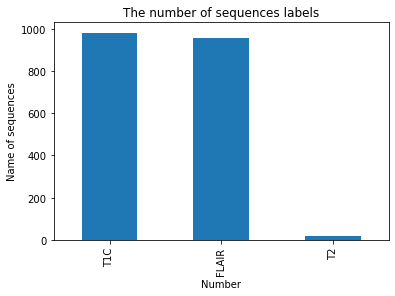

In [4]:
plot_seq = df_final['SeriesLabel'].value_counts()
print(plot_seq)
plot_seq.plot(kind='bar')
plt.title("The number of sequences labels")
plt.ylabel("Name of sequences")
plt.xlabel("Number")
plt.savefig('sequences_eda.png', dpi=600, format='png', bbox_inches='tight')

Mass_Nodule       1250
Cerebral edema     708
Name: Tag, dtype: int64


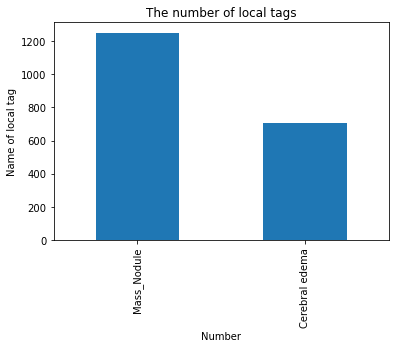

In [5]:
plot_tag = df_final['Tag'].value_counts()
print(plot_tag)
plot_tag.plot(kind='bar')
plt.title("The number of local tags")
plt.ylabel("Name of local tag")
plt.xlabel("Number")
plt.savefig('tag_eda.png', dpi=600, format='png', bbox_inches='tight')

Mass_Nodule       681
Cerebral edema    302
Name: Tag, dtype: int64


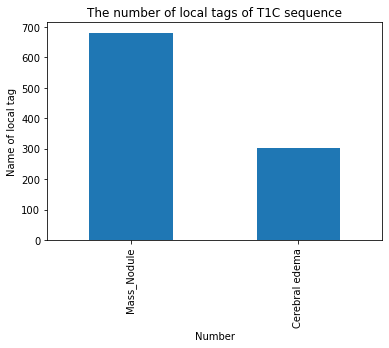

In [6]:
df_t1c = df_final[df_final['SeriesLabel']=='T1C']
plot_tag_t1c = df_t1c['Tag'].value_counts()
print(plot_tag_t1c)
plot_tag_t1c.plot(kind='bar')
plt.title("The number of local tags of T1C sequence")
plt.ylabel("Name of local tag")
plt.xlabel("Number")
plt.savefig('t1c_tag_eda.png', dpi=600, format='png', bbox_inches='tight')

Cerebral edema    11
Mass_Nodule        5
Name: Tag, dtype: int64


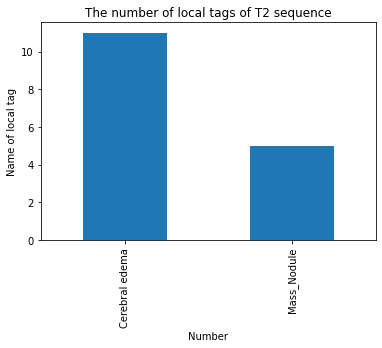

In [7]:
df_t2 = df_final[df_final['SeriesLabel']=='T2']
plot_tag_t2 = df_t2['Tag'].value_counts()
print(plot_tag_t2)
plot_tag_t2.plot(kind='bar')
plt.title("The number of local tags of T2 sequence")
plt.ylabel("Name of local tag")
plt.xlabel("Number")
plt.savefig('t2_tag_eda.png', dpi=600, format='png', bbox_inches='tight')

Mass_Nodule       564
Cerebral edema    395
Name: Tag, dtype: int64


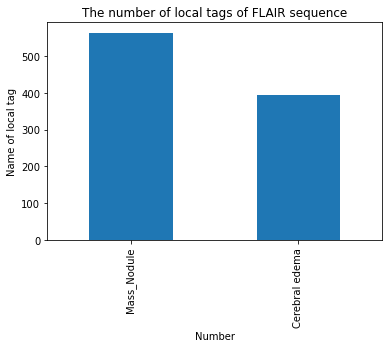

In [8]:
df_flair = df_final[df_final['SeriesLabel']=='FLAIR']
plot_tag_flair = df_flair['Tag'].value_counts()
print(plot_tag_flair)
plot_tag_flair.plot(kind='bar')
plt.title("The number of local tags of FLAIR sequence")
plt.ylabel("Name of local tag")
plt.xlabel("Number")
plt.savefig('flair_tag_eda.png', dpi=600, format='png', bbox_inches='tight')

In [5]:
# df_final.to_pickle('/home/single1/BACKUP/tintrung/brainmri/tinnvt/final_dataset.pkl')
# df_final.to_excel('/home/single1/BACKUP/tintrung/brainmri/tinnvt/final_dataset.xlsx')

## Experiment 2: Dataset split into 3 sequences: T1C, T2, Flair 

In [9]:
studiesUIDList = list(df_final['StudyInstanceUID'].drop_duplicates())
print(len(studiesUIDList))

104


In [10]:
df_t1c_mass = df_final[(df_final['SeriesLabel']=='T1C') & (df_final['Tag']=='Mass_Nodule')]
studies_t1c_mass = list(set(df_t1c_mass['StudyInstanceUID']))
df_t1c_edema = df_final[(df_final['SeriesLabel']=='T1C') & (df_final['Tag']=='Cerebral edema')]
studies_t1c_edema = list(set(df_t1c_edema['StudyInstanceUID']))

df_t2_mass = df_final[(df_final['SeriesLabel']=='T2') & (df_final['Tag']=='Mass_Nodule')]
studies_t2_mass = list(set(df_t2_mass['StudyInstanceUID']))
df_t2_edema = df_final[(df_final['SeriesLabel']=='T2') & (df_final['Tag']=='Cerebral edema')]
studies_t2_edema = list(set(df_t2_edema['StudyInstanceUID']))

df_flair_mass = df_final[(df_final['SeriesLabel']=='FLAIR') & (df_final['Tag']=='Mass_Nodule')]
studies_flair_mass = list(set(df_flair_mass['StudyInstanceUID']))
df_flair_edema = df_final[(df_final['SeriesLabel']=='FLAIR') & (df_final['Tag']=='Cerebral edema')]
studies_flair_edema = list(set(df_flair_edema['StudyInstanceUID']))

# Create files data/train.txt, data/val.txt

In [6]:
# Scikit-learn bootstrap
from sklearn.utils import resample
import os
import cv2
import pickle
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
from itertools import combinations

In [7]:
path_dataframe = '/home/single3/Documents/tintrung/brainmri/tinnvt/final_dataset.pkl'
path_train_yolov5 = '/home/single3/Documents/tintrung/yolov5_2classes/yolov5/data/train.txt'
path_val_yolov5 = '/home/single3/Documents/tintrung/yolov5_2classes/yolov5/data/val.txt'
path_root_images = '/home/single3/Documents/tintrung/yolov5_2classes/images'

## For training with only T1C

In [8]:
path_folder_save_group_train = '/home/single3/Documents/tintrung/yolov5_2classes/yolov5/saved_folds/t1c'

df_final = pd.read_pickle(path_dataframe)
studiesUID_T1C = list(df_final[df_final['SeriesLabel']=='T1C']['StudyInstanceUID'].drop_duplicates())
N = int(len(studiesUID_T1C)*0.8)
comb_t1c = combinations(studiesUID_T1C, N)
print(N)
print(len(studiesUID_T1C))
# for idx, group_studies_train in enumerate(list(comb_t1c)):
    
#     group_studies_train = list(group_studies_train) 
#     group_studies_val = list(set(studiesUID_T1C)-set(group_studies_train))
#     dcm_t1c_train = []
#     dcm_t1c_val = []

#     num_train_imgs, num_train_mass_imgs, num_train_edema_imgs, num_val_imgs, num_val_mass_imgs, num_val_edema_imgs = 0, 0, 0, 0, 0, 0
   
#     for stu in group_studies_train:
#         lst_dcm = list(df_final[df_final['StudyInstanceUID']==stu]['DicomFileName'])
#         dcm_t1c_train.extend(lst_dcm)
#         num_train_imgs += len(lst_dcm)
#         num_train_mass_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Mass_Nodule')]['DicomFileName']))
#         num_train_edema_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Cerebral edema')]['DicomFileName'])) 
    
#     for stu in group_studies_val:
#         lst_dcm = list(df_final[df_final['StudyInstanceUID']==stu]['DicomFileName'])
#         dcm_t1c_val.extend(lst_dcm)
#         num_val_imgs += len(lst_dcm)
#         num_val_mass_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Mass_Nodule')]['DicomFileName']))
#         num_val_edema_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Cerebral edema')]['DicomFileName']))
    
#     if num_train_imgs >= 6*num_val_imgs:
#         if num_train_mass_imgs >= 6*num_val_mass_imgs:
#             if num_train_edema_imgs >= 6*num_val_edema_imgs: 
#                 print(idx)
#                 # Create file data/train.txt
#                 imgs_t1c_train = [os.path.join(path_root_images, item.replace('.dcm', '.png')) for item in dcm_t1c_train]
#                 imgs_t1c_train = map(lambda x: x+'\n', imgs_t1c_train)
#                 t1c_train = open(path_train_yolov5, 'w')
#                 t1c_train.writelines(imgs_t1c_train)
#                 t1c_train.close()
#                 shutil.copy(path_train_yolov5, os.path.join(path_folder_save_group_train, 'train.txt'))
#                 os.rename(os.path.join(path_folder_save_group_train, 'train.txt'), os.path.join(path_folder_save_group_train, f'train_{idx}.txt'))
#                 # Create file data/val.txt
#                 imgs_t1c_val = [os.path.join(path_root_images, item.replace('.dcm', '.png')) for item in dcm_t1c_val]
#                 imgs_t1c_val = map(lambda x: x+'\n', imgs_t1c_val)
#                 t1c_val = open(path_val_yolov5, 'w')
#                 t1c_val.writelines(imgs_t1c_val)
#                 t1c_val.close()


11
14


## For training with only FLAIR

In [10]:
# Path
path_folder_save_group_train = '/home/single3/Documents/tintrung/yolov5_2classes/yolov5/saved_folds/flair' 

df_final = pd.read_pickle(path_dataframe)

studiesUID_FLAIR = list(df_final[df_final['SeriesLabel']=='FLAIR']['StudyInstanceUID'].drop_duplicates())
N = int(len(studiesUID_FLAIR)-2)
print(N)
print(len(studiesUID_FLAIR))
# comb_flair = combinations(studiesUID_FLAIR, N)

# for idx, group_studies_train in enumerate(list(comb_flair)):

#     group_studies_train = list(group_studies_train) 
#     group_studies_val = list(set(studiesUID_FLAIR)-set(group_studies_train))

#     dcm_flair_train = []
#     dcm_flair_val = []

#     num_train_imgs, num_train_mass_imgs, num_train_edema_imgs, num_val_imgs, num_val_mass_imgs, num_val_edema_imgs = 0, 0, 0, 0, 0, 0

#     for stu in group_studies_train:
#         lst_dcm = list(df_final[df_final['StudyInstanceUID']==stu]['DicomFileName'])
#         dcm_flair_train.extend(lst_dcm)
#         num_train_imgs += len(lst_dcm)
#         num_train_mass_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Mass_Nodule')]['DicomFileName']))
#         num_train_edema_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Cerebral edema')]['DicomFileName'])) 

#     for stu in group_studies_val:
#         lst_dcm = list(df_final[df_final['StudyInstanceUID']==stu]['DicomFileName'])
#         dcm_flair_val.extend(lst_dcm)
#         num_val_imgs += len(lst_dcm)
#         num_val_mass_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Mass_Nodule')]['DicomFileName']))
#         num_val_edema_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Cerebral edema')]['DicomFileName']))

#     if num_val_imgs > 60:
#         if num_train_imgs >= 9*num_val_imgs:
#             if num_train_mass_imgs >= 9*num_val_mass_imgs:
#                 if num_train_edema_imgs >= 9*num_val_edema_imgs: 
#                     print(idx)
    #                     # Create file data/train.txt
    #                     imgs_flair_train = [os.path.join(path_root_images, item.replace('.dcm', '.png')) for item in dcm_flair_train]
    #                     imgs_flair_train = map(lambda x: x+'\n', imgs_flair_train)
    #                     flair_train = open(path_train_yolov5, 'w')
    #                     flair_train.writelines(imgs_flair_train)
    #                     flair_train.close()
    #                     shutil.copy(path_train_yolov5, os.path.join(path_folder_save_group_train, 'train.txt'))
    #                     os.rename(os.path.join(path_folder_save_group_train, 'train.txt'), os.path.join(path_folder_save_group_train, f'train_{idx}.txt'))
    #                     # Create file data/val.txt
    #                     imgs_flair_val = [os.path.join(path_root_images, item.replace('.dcm', '.png')) for item in dcm_flair_val]
    #                     imgs_flair_val = map(lambda x: x+'\n', imgs_flair_val)
    #                     flair_val = open(path_val_yolov5, 'w')
    #                     flair_val.writelines(imgs_flair_val)
    #                     flair_val.close()
    #                     shutil.copy(path_val_yolov5, os.path.join(path_folder_save_group_train, 'val.txt'))
    #                     os.rename(os.path.join(path_folder_save_group_train, 'val.txt'), os.path.join(path_folder_save_group_train, f'val_{idx}.txt'))

87
89


## For training with only T2

In [ ]:
path_folder_save_group_train = '/home/single3/Documents/tintrung/yolov5_2classes/yolov5/saved_folds/t2'

df_final = pd.read_pickle(path_dataframe)
studiesUID_T2 = list(df_final[df_final['SeriesLabel']=='T2']['StudyInstanceUID'].drop_duplicates())
N = int(len(studiesUID_T2)*0.8)
comb_t2 = combinations(studiesUID_T2, N)

for idx, group_studies_train in enumerate(list(comb_t2)):
    
    group_studies_train = list(group_studies_train) 
    group_studies_val = list(set(studiesUID_T2)-set(group_studies_train))
    
    dcm_t2_train = []
    dcm_t2_val = []

    num_train_imgs, num_train_mass_imgs, num_train_edema_imgs, num_val_imgs, num_val_mass_imgs, num_val_edema_imgs = 0, 0, 0, 0, 0, 0
   
    for stu in group_studies_train:
        lst_dcm = list(df_final[df_final['StudyInstanceUID']==stu]['DicomFileName'])
        dcm_t2_train.extend(lst_dcm)
        num_train_imgs += len(lst_dcm)
        num_train_mass_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Mass_Nodule')]['DicomFileName']))
        num_train_edema_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Cerebral edema')]['DicomFileName'])) 
    
    for stu in group_studies_val:
        lst_dcm = list(df_final[df_final['StudyInstanceUID']==stu]['DicomFileName'])
        dcm_t2_val.extend(lst_dcm)
        num_val_imgs += len(lst_dcm)
        num_val_mass_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Mass_Nodule')]['DicomFileName']))
        num_val_edema_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Cerebral edema')]['DicomFileName']))
    
    if num_train_imgs >= 6*num_val_imgs:
        if num_train_mass_imgs >= 6*num_val_mass_imgs:
            if num_train_edema_imgs >= 6*num_val_edema_imgs: 
                print(idx)
                # Create file data/train.txt
                imgs_t2_train = [os.path.join(path_root_images, item.replace('.dcm', '.png')) for item in dcm_t2_train]
                imgs_t2_train = map(lambda x: x+'\n', imgs_t2_train)
                t2_train = open(path_train_yolov5, 'w')
                t2_train.writelines(imgs_t2_train)
                t2_train.close()
                shutil.copy(path_train_yolov5, os.path.join(path_folder_save_group_train, 'train.txt'))
                os.rename(os.path.join(path_folder_save_group_train, 'train.txt'), os.path.join(path_folder_save_group_train, f'train_{idx}.txt'))
                # Create file data/val.txt
                imgs_t2_val = [os.path.join(path_root_images, item.replace('.dcm', '.png')) for item in dcm_t2_val]
                imgs_t2_val = map(lambda x: x+'\n', imgs_t2_val)
                t2_val = open(path_val_yolov5, 'w')
                t2_val.writelines(imgs_t2_val)
                t2_val.close()

## For training with only T1C and Flair

In [11]:
# Path
path_folder_save_group_train = '/home/single3/Documents/tintrung/yolov5_2classes/yolov5/saved_folds/t1c_and_flair' 

df_final = pd.read_pickle(path_dataframe)

studiesUID_T1C_FLAIR = list(df_final[(df_final['SeriesLabel']=='T1C') | (df_final['SeriesLabel']=='FLAIR')]['StudyInstanceUID'].drop_duplicates())
N = int(len(studiesUID_T1C_FLAIR)-3)
print(len(studiesUID_T1C_FLAIR))
print(N)

# comb_t1c_flair = combinations(studiesUID_T1C_FLAIR, N)

# for idx, group_studies_train in enumerate(list(comb_t1c_flair)):
# # for idx in range(10000):
# #     group_studies_train = list(comb_t1c_flair)[idx]
#     group_studies_train = list(group_studies_train) 
#     group_studies_val = list(set(studiesUID_T1C_FLAIR)-set(group_studies_train))

#     dcm_t1c_flair_train = []
#     dcm_t1c_flair_val = []

#     num_train_imgs, num_train_mass_imgs, num_train_edema_imgs, num_val_imgs, num_val_mass_imgs, num_val_edema_imgs = 0, 0, 0, 0, 0, 0

#     for stu in group_studies_train:
#         lst_dcm = list(df_final[df_final['StudyInstanceUID']==stu]['DicomFileName'])
#         dcm_t1c_flair_train.extend(lst_dcm)
#         num_train_imgs += len(lst_dcm)
#         num_train_mass_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Mass_Nodule')]['DicomFileName']))
#         num_train_edema_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Cerebral edema')]['DicomFileName'])) 

#     for stu in group_studies_val:
#         lst_dcm = list(df_final[df_final['StudyInstanceUID']==stu]['DicomFileName'])
#         dcm_t1c_flair_val.extend(lst_dcm)
#         num_val_imgs += len(lst_dcm)
#         num_val_mass_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Mass_Nodule')]['DicomFileName']))
#         num_val_edema_imgs += len(list(df_final[(df_final['StudyInstanceUID']==stu) & (df_final['Tag']=='Cerebral edema')]['DicomFileName']))

#     if num_val_imgs > 300:
#         if num_train_imgs >= 4*num_val_imgs:
#             if num_train_mass_imgs >= 4*num_val_mass_imgs:
#                 if num_train_edema_imgs >= 4*num_val_edema_imgs: 
#                     print(idx)
#                     # Create file data/train.txt
#                     imgs_t1c_flair_train = [os.path.join(path_root_images, item.replace('.dcm', '.png')) for item in dcm_t1c_flair_train]
#                     imgs_t1c_flair_train = map(lambda x: x+'\n', imgs_t1c_flair_train)
#                     t1c_flair_train = open(path_train_yolov5, 'w')
#                     t1c_flair_train.writelines(imgs_t1c_flair_train)
#                     t1c_flair_train.close()
#                     shutil.copy(path_train_yolov5, os.path.join(path_folder_save_group_train, 'train.txt'))
#                     os.rename(os.path.join(path_folder_save_group_train, 'train.txt'), os.path.join(path_folder_save_group_train, f'train_{idx}.txt'))
#                     # Create file data/val.txt
#                     imgs_t1c_flair_val = [os.path.join(path_root_images, item.replace('.dcm', '.png')) for item in dcm_t1c_flair_val]
#                     imgs_t1c_flair_val = map(lambda x: x+'\n', imgs_t1c_flair_val)
#                     t1c_flair_val = open(path_val_yolov5, 'w')
#                     t1c_flair_val.writelines(imgs_t1c_flair_val)
#                     t1c_flair_val.close()
#                     shutil.copy(path_val_yolov5, os.path.join(path_folder_save_group_train, 'val.txt'))
#                     os.rename(os.path.join(path_folder_save_group_train, 'val.txt'), os.path.join(path_folder_save_group_train, f'val_{idx}.txt'))

103
100
